# Customer Churn Prediction

### Submitted by: *Ashmina T.*

**Objective:** To build a machine learning model to predict whether the customer will churn or not in the next six months.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
#loading the train dataset
train_data = pd.read_csv('train.csv')

In [3]:
#displaying first 5 rows of training set
train_data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [4]:
#shape of training set
train_data.shape

(6650, 11)

There are 6650 rows and 11 columns in the training set.

In [5]:
#loading the test set
test = pd.read_csv('test.csv')

In [6]:
#displaying first 5 rows in the test data
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [7]:
#shape of the test set
test.shape

(2851, 10)

There are 2851 rows and 10 columns in the test data.

In [8]:
#getting concise summary of the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [9]:
#getting concise summary of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


Here the feature 'Transaction_Status' and 'Credit_Card' are categorical, but their datatype is given as int64. So, we have to change their datatype to object.

In [10]:
#changing the datatypes
features = ['Transaction_Status','Credit_Card']
for f in features:
    train_data[f] = train_data[f].astype('object')
    test[f] = test[f].astype('object')
#train_data['Is_Churn'] = train_data['Is_Churn'].astype('object')

In [11]:
#checking the datatypes
train_data.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status     object
Product_Holdings       object
Credit_Card            object
Credit_Category        object
Is_Churn                int64
dtype: object

In [12]:
#statistical summary of training data
train_data.describe()

,Age,Balance,Vintage,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.231128
std,9.685747,5.157549e+05,1.458795,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000


In [13]:
#statistical summary of the test data
test.describe()

,Age,Balance,Vintage
count,2851.000000,2.851000e+03,2851.000000
mean,41.252192,8.098990e+05,2.220975
std,9.616756,5.252003e+05,1.489941
min,21.000000,1.503000e+03,0.000000
25%,34.000000,4.009684e+05,1.000000
50%,40.000000,7.659125e+05,2.000000
75%,47.000000,1.154238e+06,3.000000
max,72.000000,2.434834e+06,5.000000


### Preprocessing

In [14]:
#checking for missing values in train data
train_data.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [15]:
#checking for missing values in test data
test.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

There are no missing values in both train and test data.

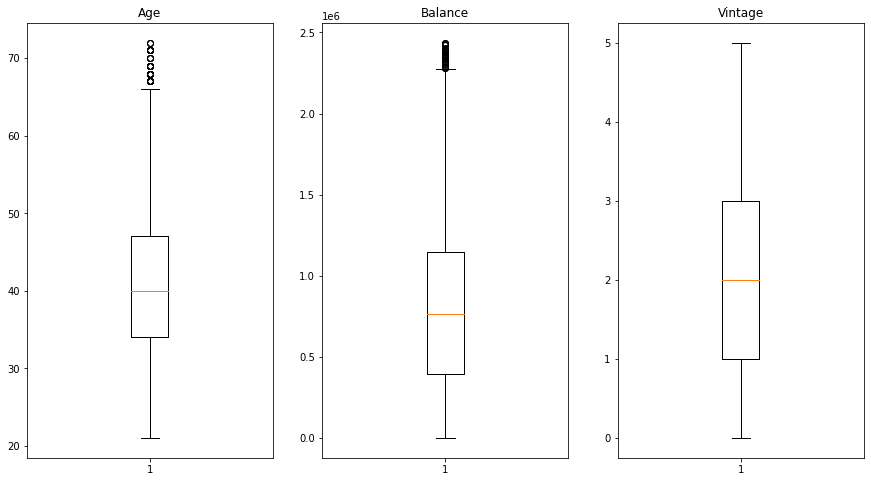

In [16]:
#checking for outliers in the train data
num_columns = train_data.select_dtypes(exclude=['object']).columns.difference(['Is_Churn'])
plt.figure(figsize=(15,8))
for i,feature in enumerate(num_columns):
    plt.subplot(1,3,i+1)
    plt.boxplot(train_data[feature])
    plt.title(feature)


There are some outliers in 'Age' and 'Balance' columns. Outliers in 'Age' column is between 65-80 age, that are valid age values, and we can't consider them as an outlier for this dataset.

In [17]:
train_data['Balance'].max()

2436615.81

The maximum values in 'Balance' column can't be considered as an outlier.

In [18]:
#splitting the training set into feature matrix and target vector
X = train_data.drop('Is_Churn',axis=1)
y = train_data['Is_Churn']

In [19]:
#shape of the feature matrix
X.shape

(6650, 10)

In [20]:
#shape of the target vector
y.shape

(6650,)

In [21]:
X.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category'],
      dtype='object')

In [22]:
#droping the ID column from feature matrix and test data as it isn't required for our ml model
X.drop('ID',axis=1,inplace=True)
test_data = test.drop('ID',axis=1)

In [23]:
#one-hot encoding
encoded_train_data = pd.get_dummies(X,drop_first=True)
encoded_test_data = pd.get_dummies(test_data,drop_first=True)

In [24]:
encoded_train_data.columns

Index(['Age', 'Balance', 'Vintage', 'Gender_Male', 'Income_5L - 10L',
       'Income_Less than 5L', 'Income_More than 15L', 'Transaction_Status_1',
       'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Card_1',
       'Credit_Category_Good', 'Credit_Category_Poor'],
      dtype='object')

In [25]:
encoded_test_data.columns

Index(['Age', 'Balance', 'Vintage', 'Gender_Male', 'Income_5L - 10L',
       'Income_Less than 5L', 'Income_More than 15L', 'Transaction_Status_1',
       'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Card_1',
       'Credit_Category_Good', 'Credit_Category_Poor'],
      dtype='object')

In [26]:
numerical_train_data = encoded_train_data.select_dtypes(include=['int64','float64'])
numerical_train_data.describe()

,Age,Balance,Vintage
count,6650.000000,6.650000e+03,6650.000000
mean,41.130226,8.045954e+05,2.250226
std,9.685747,5.157549e+05,1.458795
min,21.000000,6.300000e+01,0.000000
25%,34.000000,3.922642e+05,1.000000
50%,40.000000,7.649386e+05,2.000000
75%,47.000000,1.147124e+06,3.000000
max,72.000000,2.436616e+06,5.000000


All numerical columns are in different scales. So, we have to do feature scaling.

In [27]:
#standard scaling
standard_scale = StandardScaler()
num_col = numerical_train_data.columns
scale = standard_scale.fit(numerical_train_data)
#scaling train data
encoded_train_data[num_col] = scale.transform(numerical_train_data)

#scaling test data
numerical_test_data = encoded_test_data.select_dtypes(include=['int64','float64'])
encoded_test_data[num_col] = scale.transform(numerical_test_data)

In [28]:
encoded_train_data.describe()

,Age,Balance,Vintage,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Transaction_Status_1,Product_Holdings_2,Product_Holdings_3+,Credit_Card_1,Credit_Category_Good,Credit_Category_Poor
count,6.650000e+03,6.650000e+03,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000
mean,-1.014644e-16,-1.782315e-16,-2.866546e-17,0.543158,0.277744,0.236541,0.202256,0.515789,0.478496,0.040301,0.664361,0.230226,0.462556
std,1.000075e+00,1.000075e+00,1.000075e+00,0.498171,0.447920,0.424990,0.401712,0.499788,0.499575,0.196678,0.472249,0.421009,0.498633
min,-2.078491e+00,-1.560030e+00,-1.542639e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.362119e-01,-7.995313e-01,-8.570906e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.166983e-01,-7.689653e-02,-1.715418e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.060674e-01,6.641801e-01,5.140070e-01,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.187374e+00,3.164572e+00,1.885105e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
encoded_test_data.describe()

,Age,Balance,Vintage,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Transaction_Status_1,Product_Holdings_2,Product_Holdings_3+,Credit_Card_1,Credit_Category_Good,Credit_Category_Poor
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,0.012593,0.010284,-0.020053,0.541915,0.278499,0.227289,0.198176,0.506840,0.476675,0.052613,0.668888,0.250789,0.445458
std,0.992952,1.018390,1.021427,0.498327,0.448339,0.419154,0.398695,0.500041,0.499543,0.223299,0.470696,0.433543,0.497103
min,-2.078491,-1.557237,-1.542639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.736212,-0.782653,-0.857091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.116698,-0.075008,-0.171542,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.606067,0.677975,0.514007,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.187374,3.161116,1.885105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modeling

In [30]:
#counts per class
y.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

There is a class imbalance. To overcome that we use SMOTE technique.

In [31]:
#resampling the dataset using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
#fit predictor and target variables
X_smote,y_smote = smote.fit_resample(encoded_train_data,y)

print("Original dataset shape:",Counter(y))
print("Resampled dataset shape:",Counter(y_smote))

Original dataset shape: Counter({0: 5113, 1: 1537})
Resampled dataset shape: Counter({1: 5113, 0: 5113})


In [32]:
#splitting the train data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=42, test_size=0.2)

#### Logistic regression

In [33]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating an instance of the logistic regression model
logistic_model = LogisticRegression(max_iter=500)
#training the model
logistic_model.fit(X_train,y_train)
#testing the model
y_pred = logistic_model.predict(X_test)

#measuring performance
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy is: 0.6520039100684262
Confusion_matrix:
 [[686 342]
 [370 648]]


#### KNN

In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=2,weights='distance')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
    
#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.791
Confusion Matrix:
 [[706 322]
 [105 913]]


#### Naive Bayes Classifier

In [35]:
#implementing Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.639
Confusion Matrix:
 [[486 542]
 [196 822]]


#### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
#training the model
dt_model.fit(X_train,y_train)
#testing the model
y_pred = dt_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.750
Confusion Matrix:
 [[747 281]
 [231 787]]


#### Random Forest Algorithm

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.827
Confusion Matrix:
 [[839 189]
 [165 853]]


#### Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=0)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.764
Confusion Matrix:
 [[804 224]
 [258 760]]


#### Bagging classifier

In [39]:
from sklearn.ensemble import BaggingClassifier
bc_model = BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=0)
bc_model.fit(X_train, y_train)
y_pred = bc_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.822
Confusion Matrix:
 [[831 197]
 [168 850]]


We are going to use Random Forest Classifier for predicting the labels for the test data.

In [40]:
#random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_smote,y_smote)
y_pred = rf_model.predict(encoded_test_data)

In [81]:
#creating a new dataframe with ID and y_pred
submission = pd.read_csv('sample.csv')
submission['Is_Churn']=y_pred
pd.DataFrame(submission, columns=['ID','Is_Churn']).to_csv('sample_submission.csv',index=False)

In [82]:
data=pd.read_csv('sample_submission.csv')

In [83]:
data.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,1
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
